### CRISP - DM Method
- Barry - Business Understanding
- Drove - Data Understanding
- Directly to the - Data Prep
- Medical - Modelling
- Emergency  - Evaluation
- Department - mDeployment 

# 1.  Business Understanding
- Forecasting transactions
- Likely regression
- Data for 3 years
- Advised data quality is okay

# 2. Data Understanding

In [4]:
import pandas as pd

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9d33fefcf23e44d0a7a7207ddbaf5907 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Np-yH696XxM06t1HzmGf5qTRZ71Zyjgs6D5nnxq5m9-s',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

body = client_9d33fefcf23e44d0a7a7207ddbaf5907.get_object(Bucket='regressiionproject-donotdelete-pr-qfxy5wa8wm87oi',Key='regression.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



In [6]:
df = pd.read_csv(body)

In [7]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [8]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [10]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [11]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [12]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

## Visualize Data

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

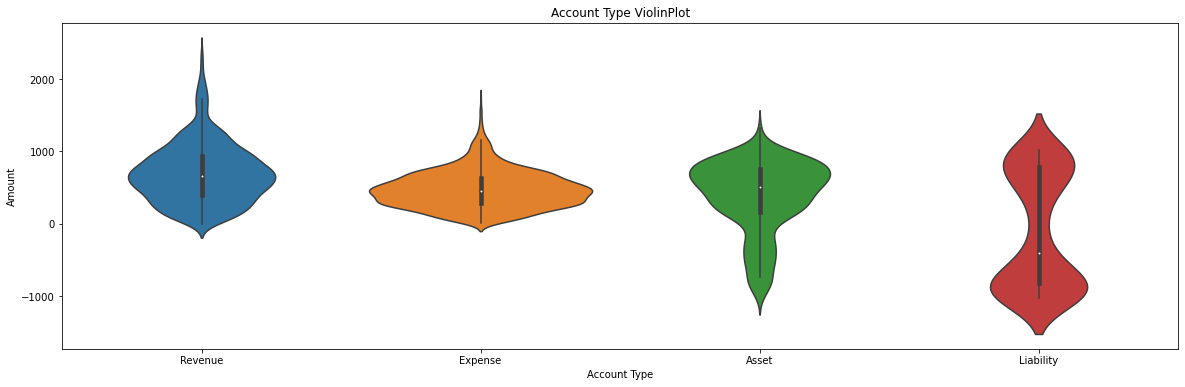

In [14]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show()

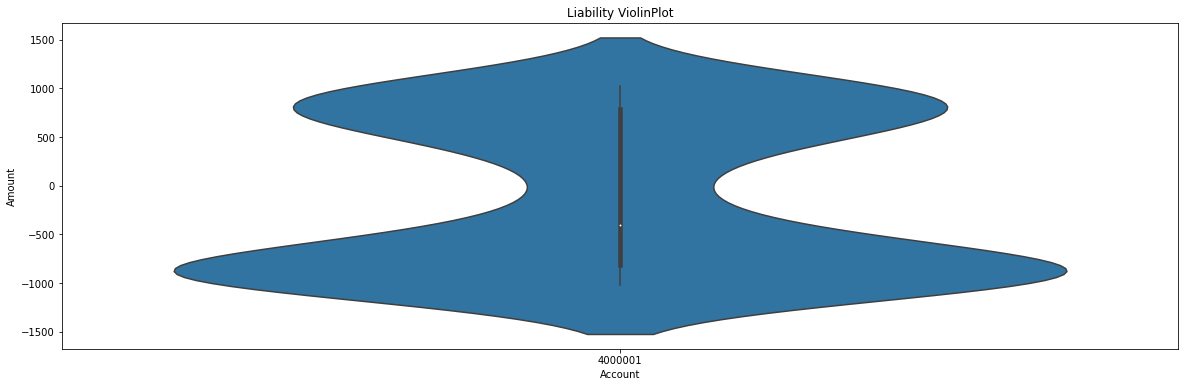

In [15]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

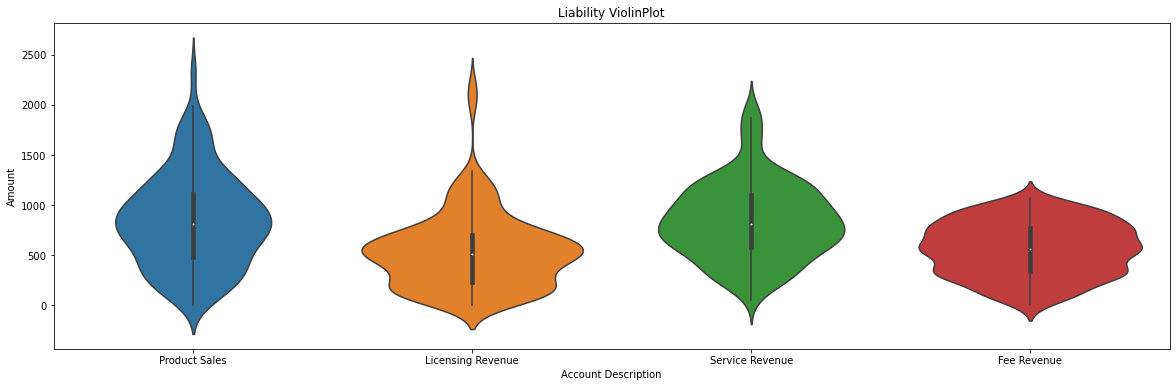

In [16]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Liability ViolinPlot')
plt.show()

## Review Trends

In [17]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [18]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [19]:
monthmap['Jan']

1

In [20]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [21]:
df['Day'] = 1

In [22]:
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

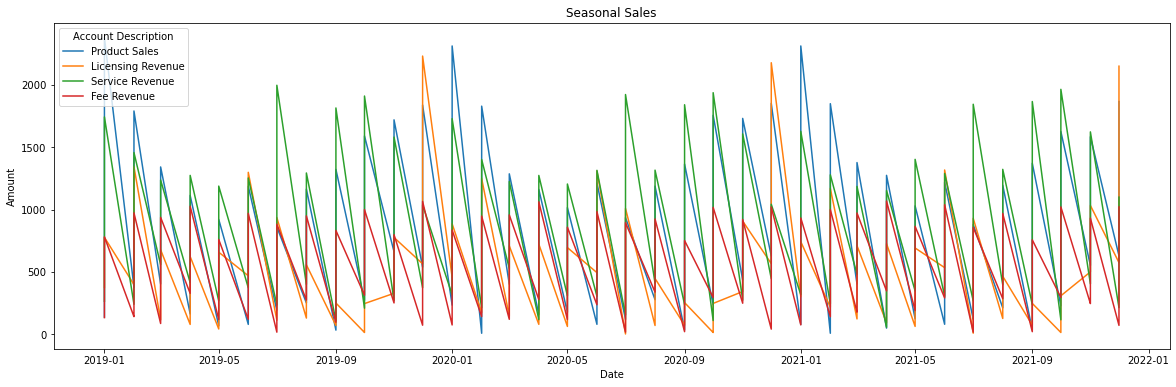

In [25]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

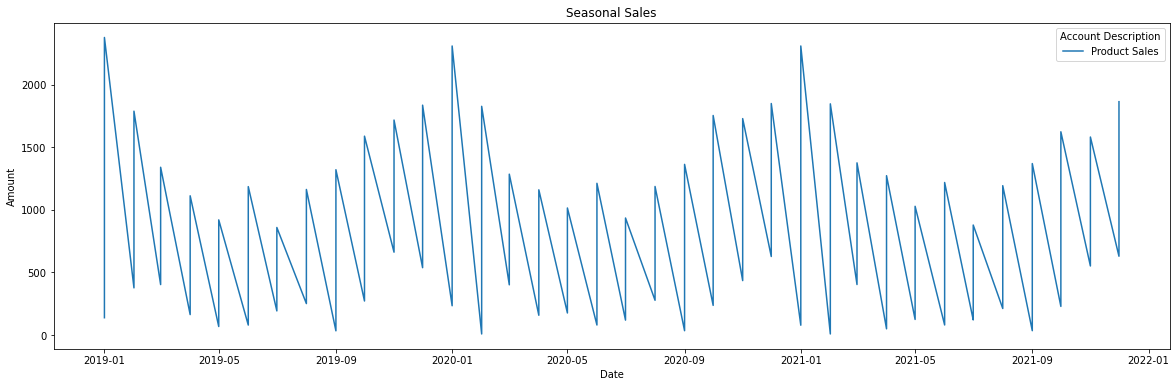

In [26]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
plt.show()

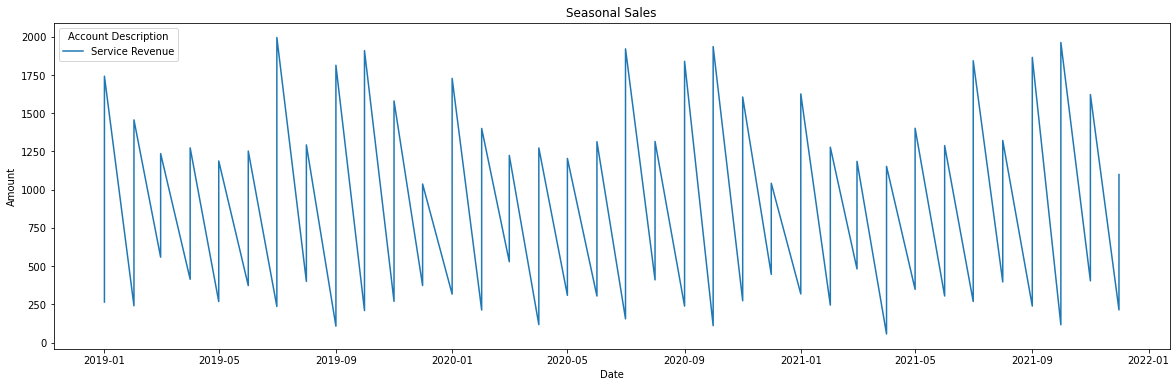

In [27]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

## Correlation

In [28]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [29]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [30]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [32]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0) 

In [33]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


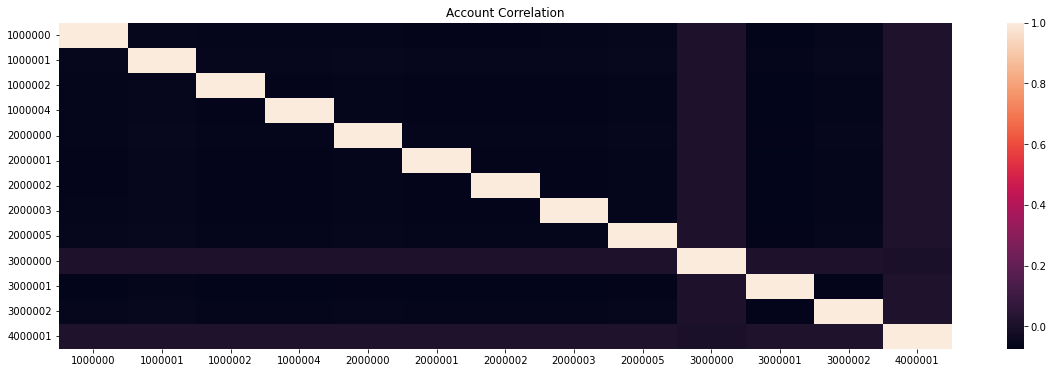

In [34]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

In [35]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [36]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


# 3. Data Preparation

In [37]:
import numpy as np

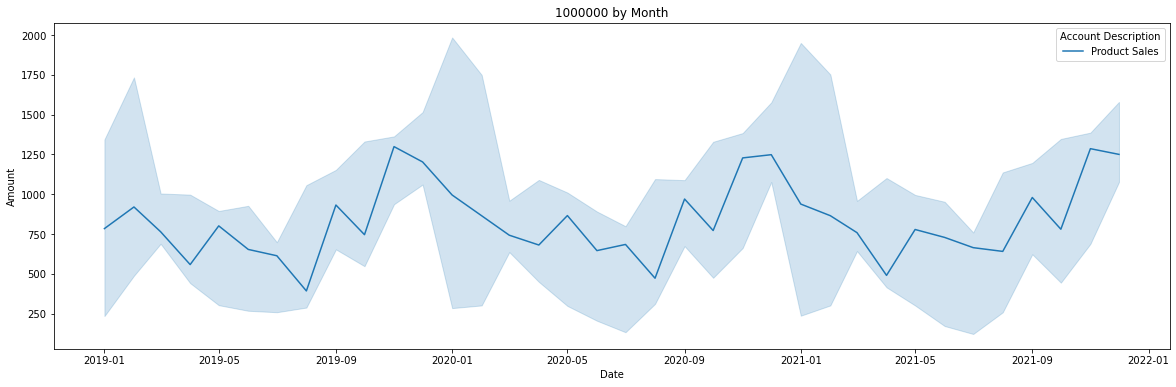

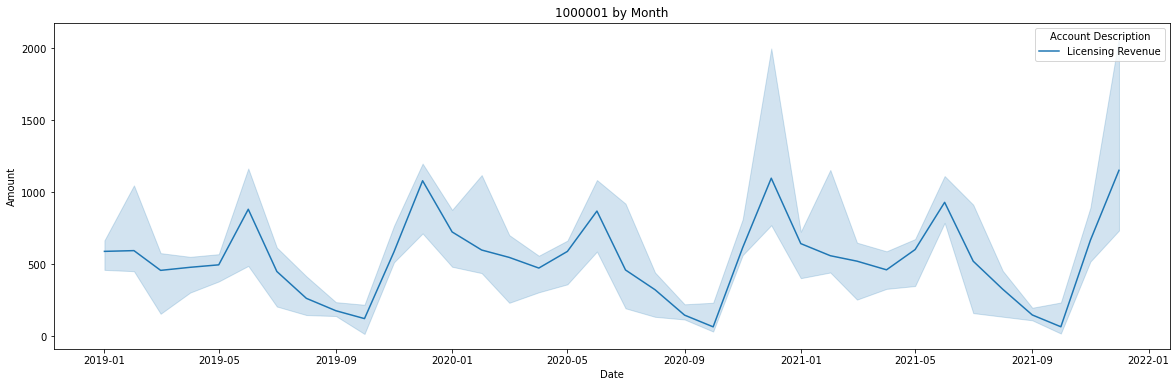

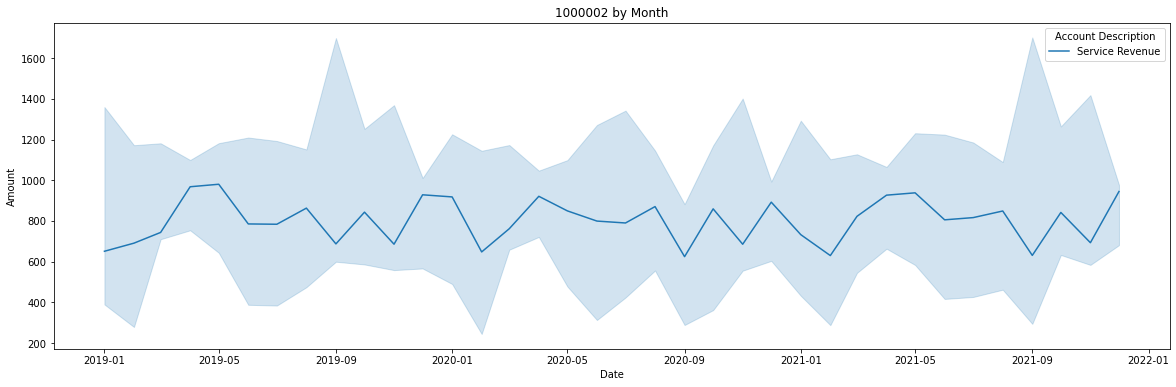

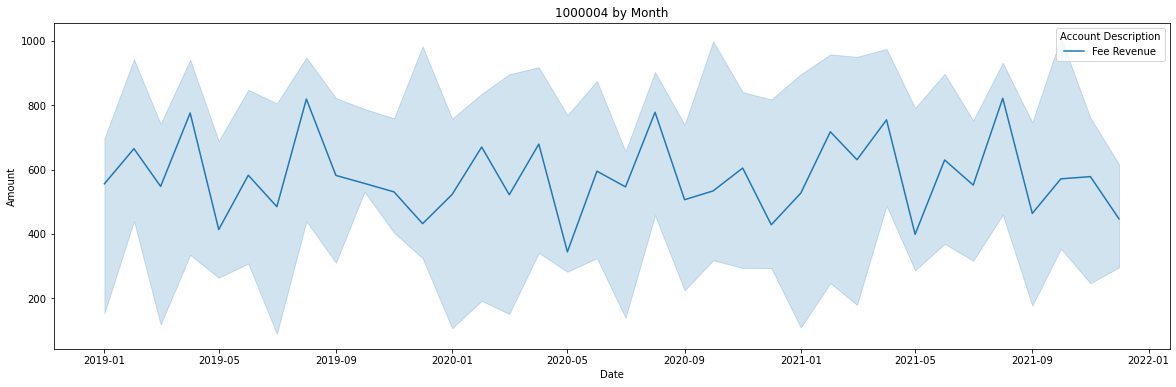

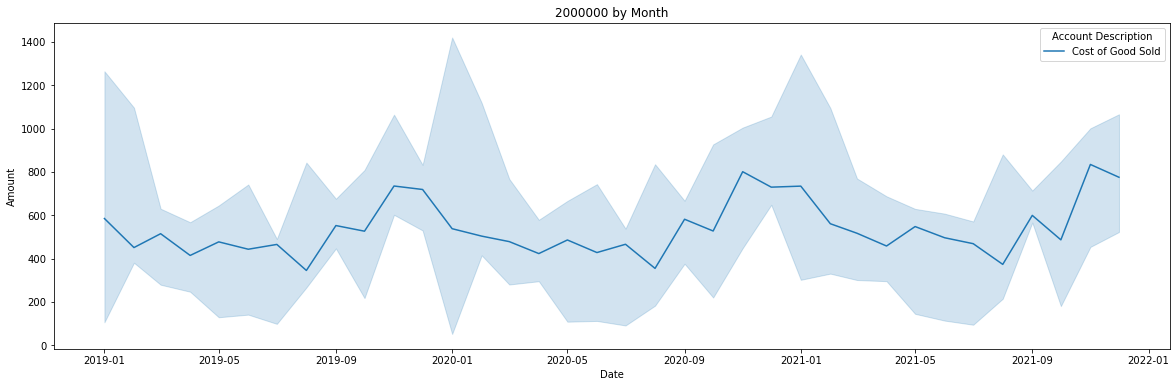

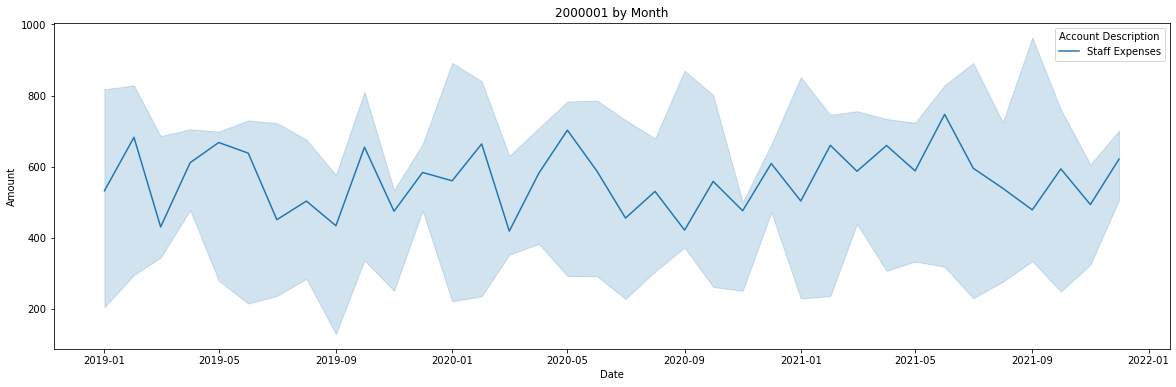

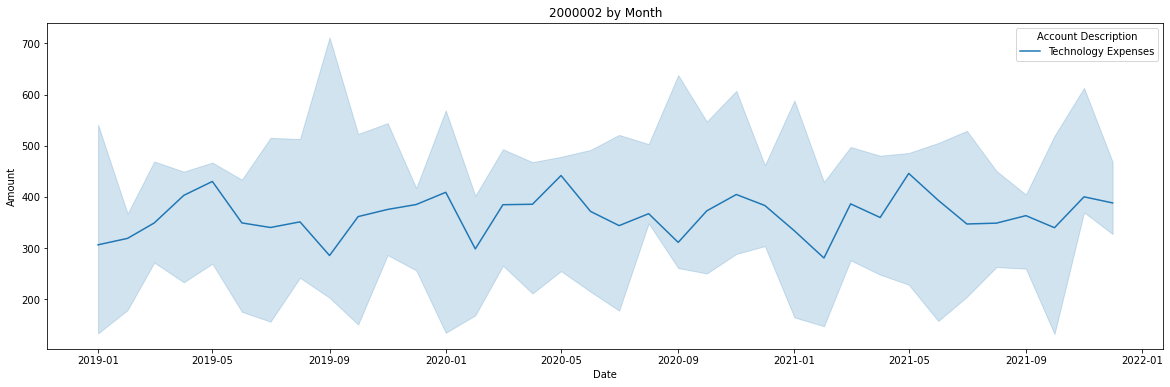

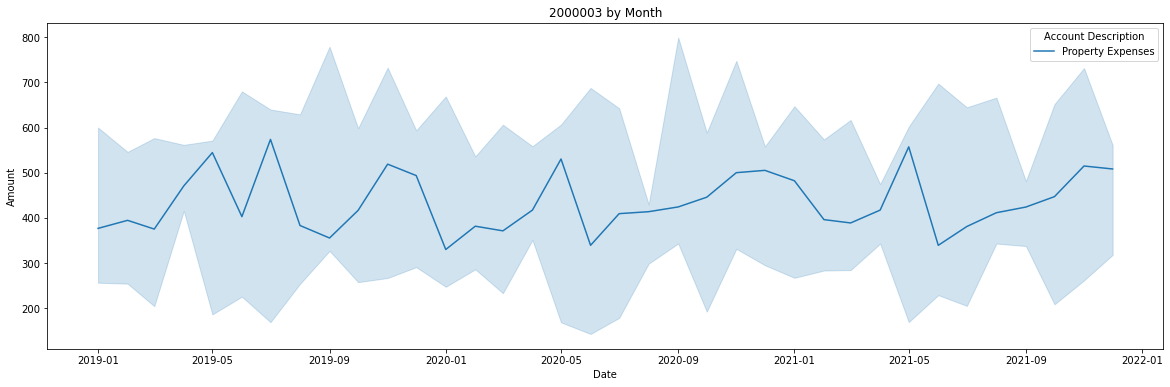

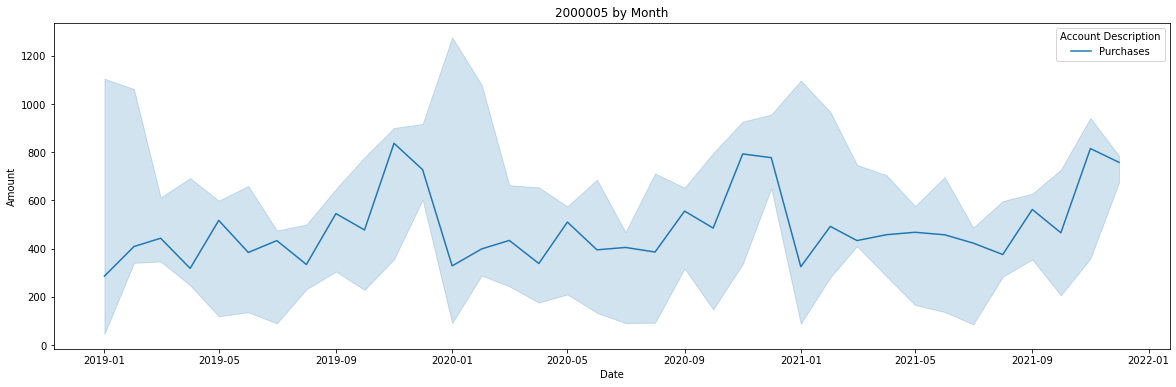

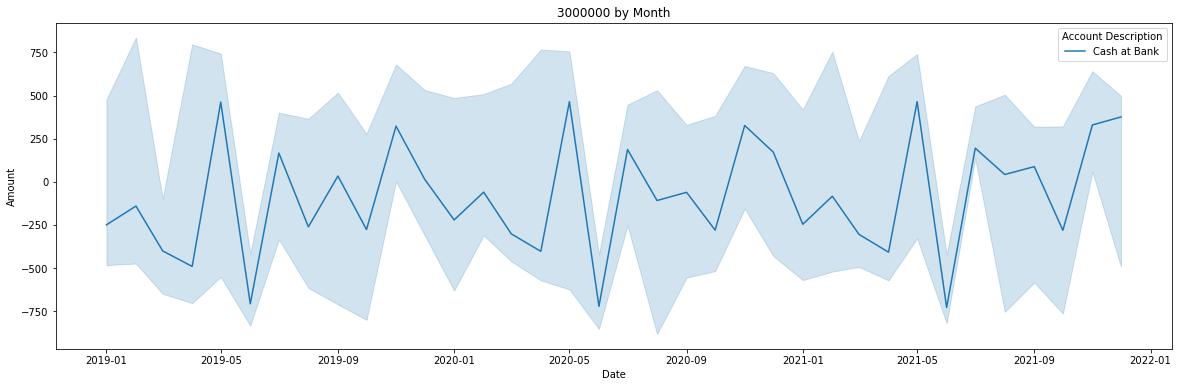

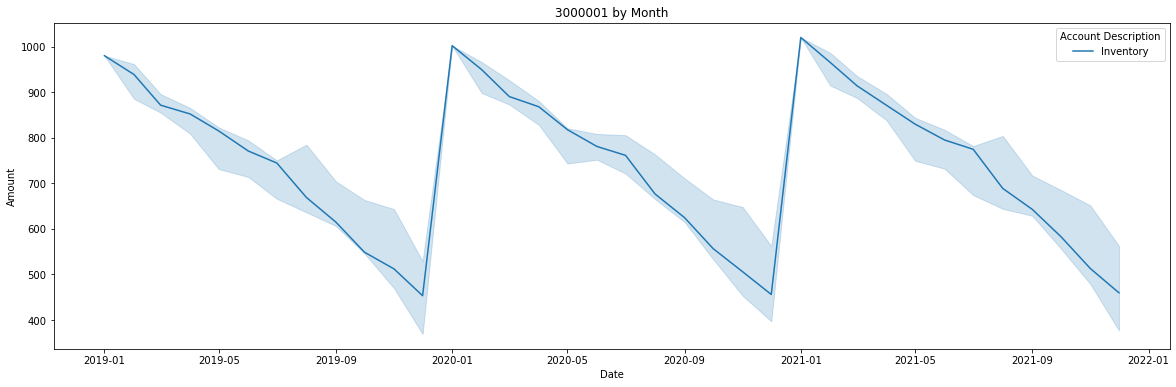

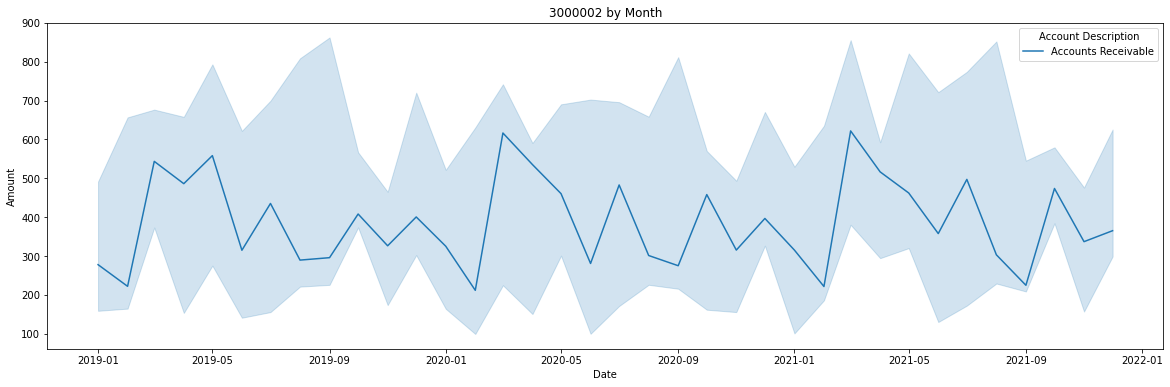

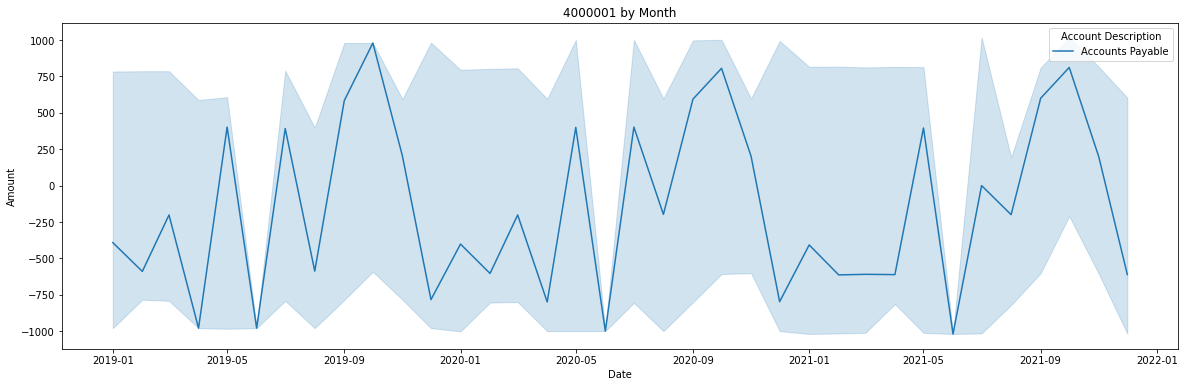

In [38]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

In [39]:
#df = df[df['Account']!=3000001]

In [40]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001])

## Convert Fields to Correct Data Type

In [41]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [42]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [43]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [44]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [45]:
df['Year'] = df['Year'].astype(str)

In [46]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

### Drop Analysis Fields

In [47]:
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)

In [48]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [49]:
len(df['Account'].unique())

13

In [50]:
len(df['Account Description'].unique())

13

In [51]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [52]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [53]:
len(df['AccountVal'].unique())

13

In [54]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [55]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


In [56]:
pd.get_dummies(df)

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4209,537.478,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [57]:
df = pd.get_dummies(df)

In [58]:
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

# 4. Modelling

In [60]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2948, 41) (1264, 41) (2948,) (1264,)


### Import Dependencies

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [65]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [66]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [69]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.291e+07, tolerance: 6.673e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.224e+07, tolerance: 6.519e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.757e+06, tolerance: 6.411e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.212e+06, tolerance: 6.457e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

lasso has been successfully fit.
Starting training for enet.


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.750e+07, tolerance: 6.673e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.645e+07, tolerance: 6.519e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

enet has been successfully fit.


In [70]:
fit_models['ridge'].predict(X_test)

array([ 526.45072362,  508.65685547,  465.37890944, ..., -297.09355664,
        708.13679594,  621.74398962])

# 5. Evaluation

In [71]:
from sklearn.metrics import r2_score, mean_absolute_error

In [72]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9342019743760693 MAE:76.33576577531646
gb scores - R2:0.6353516501682552 MAE:190.8419509203904
ridge scores - R2:0.5093625023110633 MAE:224.88706328103038
lasso scores - R2:0.509750861393047 MAE:224.4782275114179
enet scores - R2:0.5086617173444186 MAE:225.02988780517327


In [73]:
best_model = fit_models['rf']

In [74]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

# 6. Deployment

- URLS
    - Dallas: https://us-south.ml.cloud.ibm.com, 
    - London - https://eu-gb.ml.cloud.ibm.com, 
    - Frankfurt - https://eu-de.ml.cloud.ibm.com, 
    - Tokyo - https://jp-tok.ml.cloud.ibm.com

## 6.1 Import and Install dependencies

In [75]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 10.6 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.222
    Uninstalling ibm-watson-machine-learning-1.0.222:
      Successfully uninstalled ibm-watson-machine-learning-1.0.222


In [76]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

## 6.2 Authenticate and Set Space

In [77]:
wml_credentials = {
    "apikey":" ****YOUR API KEY**** ",
    "url":" ****YOUR URL (one from above)****"
}

In [78]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------  ------------------------
ID                                    NAME               CREATED
f470a9da-19f6-4f0b-bac0-a27860fbff72  MyDeploymentSpace  2022-07-19T08:55:41.330Z
------------------------------------  -----------------  ------------------------


In [79]:
SPACE_ID=" ****YOUR SPACE ID **** "

In [80]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

## 6.3 Save and Deploy Model

In [81]:
MODEL_NAME = 'Sklearn Forecast'
DEPLOYMENT_NAME = 'Sklearn Deployment'
BEST_MODEL = best_model

In [82]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

#Save model
model_details = wml_client.repository.store_model(
    model=BEST_MODEL, 
    meta_props=model_props, 
    training_data=X_train.head(), 
    training_target=y_train.head()
)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1452: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [83]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Amount',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'Year_2019', 'type': 'uint8'},
      {'name': 'Year_2020', 'type': 'uint8'},
      {'name': 'Year_2021', 'type': 'uint8'},
      {'name': 'Month_Apr', 'type': 'uint8'},
      {'name': 'Month_Aug', 'type': 'uint8'},
      {'name': 'Month_Dec', 'type': 'uint8'},
      {'name': 'Month_Feb', 'type': 'uint8'},
      {'name': 'Month_Jan', 'type': 'uint8'},
      {'name': 'Month_Jul', 'type': 'uint8'},
      {'name': 'Month_Jun', 'type': 'uint8'},
      {'name': 'Month_Mar', 'type': 'uint8'},
      {'name': 'Month_May', 'type': 'uint8'},
      {'name': 'Month_Nov', 'type': 'uint8'},
   

In [87]:
model_uid = wml_client.repository.get_model_id(model_details); model_uid

'f225c07b-484d-4f51-bcbf-d9f94cd59dde'

In [88]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)

# Output result
deployment



#######################################################################################

Synchronous deployment creation for uid: 'f225c07b-484d-4f51-bcbf-d9f94cd59dde' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='68fee12d-6c44-4a6f-92a1-f26c0c9816b3'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': 'f225c07b-484d-4f51-bcbf-d9f94cd59dde'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Sklearn Deployment',
  'online': {},
  'space_id': 'f470a9da-19f6-4f0b-bac0-a27860fbff72',
  'status': {'online_url': {'url': 'https://jp-tok.ml.cloud.ibm.com/ml/v4/deployments/68fee12d-6c44-4a6f-92a1-f26c0c9816b3/predictions'},
   'serving_urls': ['https://jp-tok.ml.cloud.ibm.com/ml/v4/deployments/68fee12d-6c44-4a6f-92a1-f26c0c9816b3/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2022-07-19T09:22:35.839Z',
  'id': '68fee12d-6c44-4a6f-92a1-f26c0c9816b3',
  'modified_at': '2022-07-19T09:22:35.839Z',
  'name': 'Sklearn Deployment',
  'owner': 'IBMid-662003ABJZ',
  'space_id': 'f470a9da-19f6-4f0b-bac0-a27860fbff72'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'online_url is deprecated and will be removed in a future release

## 6.4 Score Against Deployed Model

In [89]:
deployment_uid = wml_client.deployments.get_uid(deployment)
payload = {"input_data":
           [
               {"fields":X_test.columns.to_numpy().tolist(), "values":X_test.to_numpy().tolist()}
           ]
          }
result = wml_client.deployments.score(deployment_uid, payload); result

{'predictions': [{'fields': ['prediction'],
   'values': [[551.9050999999998],
    [601.0515100000005],
    [461.44576000000035],
    [365.02491000000003],
    [923.35889],
    [730.5702199999997],
    [698.4591199999995],
    [183.13639999999998],
    [283.0051399999998],
    [525.45957],
    [225.72858000000008],
    [1363.9534299999984],
    [584.0143799999997],
    [906.13707],
    [562.0607500000004],
    [508.34],
    [515.3106],
    [424.3440799999998],
    [418.15604],
    [539.2731599999996],
    [434.12400000000014],
    [585.9245499999994],
    [80.34659999999998],
    [386.40256999999997],
    [113.03762000000013],
    [618.5324399999998],
    [-243.3739300000001],
    [336.34322999999995],
    [284.6303099999998],
    [-314.3516299999997],
    [295.76],
    [417.87495999999976],
    [950.3248199999997],
    [710.3037400000001],
    [78.38091],
    [1004.6674300000006],
    [-711.4248299999996],
    [580.4005899999997],
    [587.0648700000002],
    [424.97652000000033],
   

In [90]:
payload

{'input_data': [{'fields': ['Year_2019',
    'Year_2020',
    'Year_2021',
    'Month_Apr',
    'Month_Aug',
    'Month_Dec',
    'Month_Feb',
    'Month_Jan',
    'Month_Jul',
    'Month_Jun',
    'Month_Mar',
    'Month_May',
    'Month_Nov',
    'Month_Oct',
    'Month_Sep',
    'Cost Centre_CC100',
    'Cost Centre_CC101',
    'Cost Centre_CC102',
    'Cost Centre_CC200',
    'Cost Centre_CC201',
    'Cost Centre_CC202',
    'Cost Centre_CC300',
    'Cost Centre_CC301',
    'Cost Centre_CC302',
    'Account_ACC1000000',
    'Account_ACC1000001',
    'Account_ACC1000002',
    'Account_ACC1000004',
    'Account_ACC2000000',
    'Account_ACC2000001',
    'Account_ACC2000002',
    'Account_ACC2000003',
    'Account_ACC2000005',
    'Account_ACC3000000',
    'Account_ACC3000001',
    'Account_ACC3000002',
    'Account_ACC4000001',
    'Account Type_Asset',
    'Account Type_Expense',
    'Account Type_Liability',
    'Account Type_Revenue'],
   'values': [[0,
     0,
     1,
     0,
   

In [91]:
pred_values = np.squeeze(result['predictions'][0]['values']); pred_values
preddf = X_test.join(y_test)
preddf['Scores'] = pred_values
preddf.head()

,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue,Amount,Scores
4050,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,514.924,551.90510
3576,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,699.906,601.05151
292,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,453.516,461.44576
1864,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,492.930,365.02491
2055,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,998.773,923.35889


In [92]:
pred_values

array([ 551.9051 ,  601.05151,  461.44576, ..., -481.12   ,  624.83343,
       1064.71953])

In [93]:
preddf.to_csv('results.csv')